In [16]:
# importing libraries
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import os, sys
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error

In [17]:
# importing data
df = pd.read_csv('data/unique_outages.csv', parse_dates=['Start', 'Finish'])

# remove unplanned
df = df[df['Unplanned?'] != 1]

# filter the duration hours, only if there are expected outages, and non-outlier values, remove the one 'VIC/ TAS'
df = df[(df['Duration_Hours'] <= 1000) &(df['Duration_Hours'] != 0) & (df['Region'] != 'VIC/ TAS')]
# df.head(5)

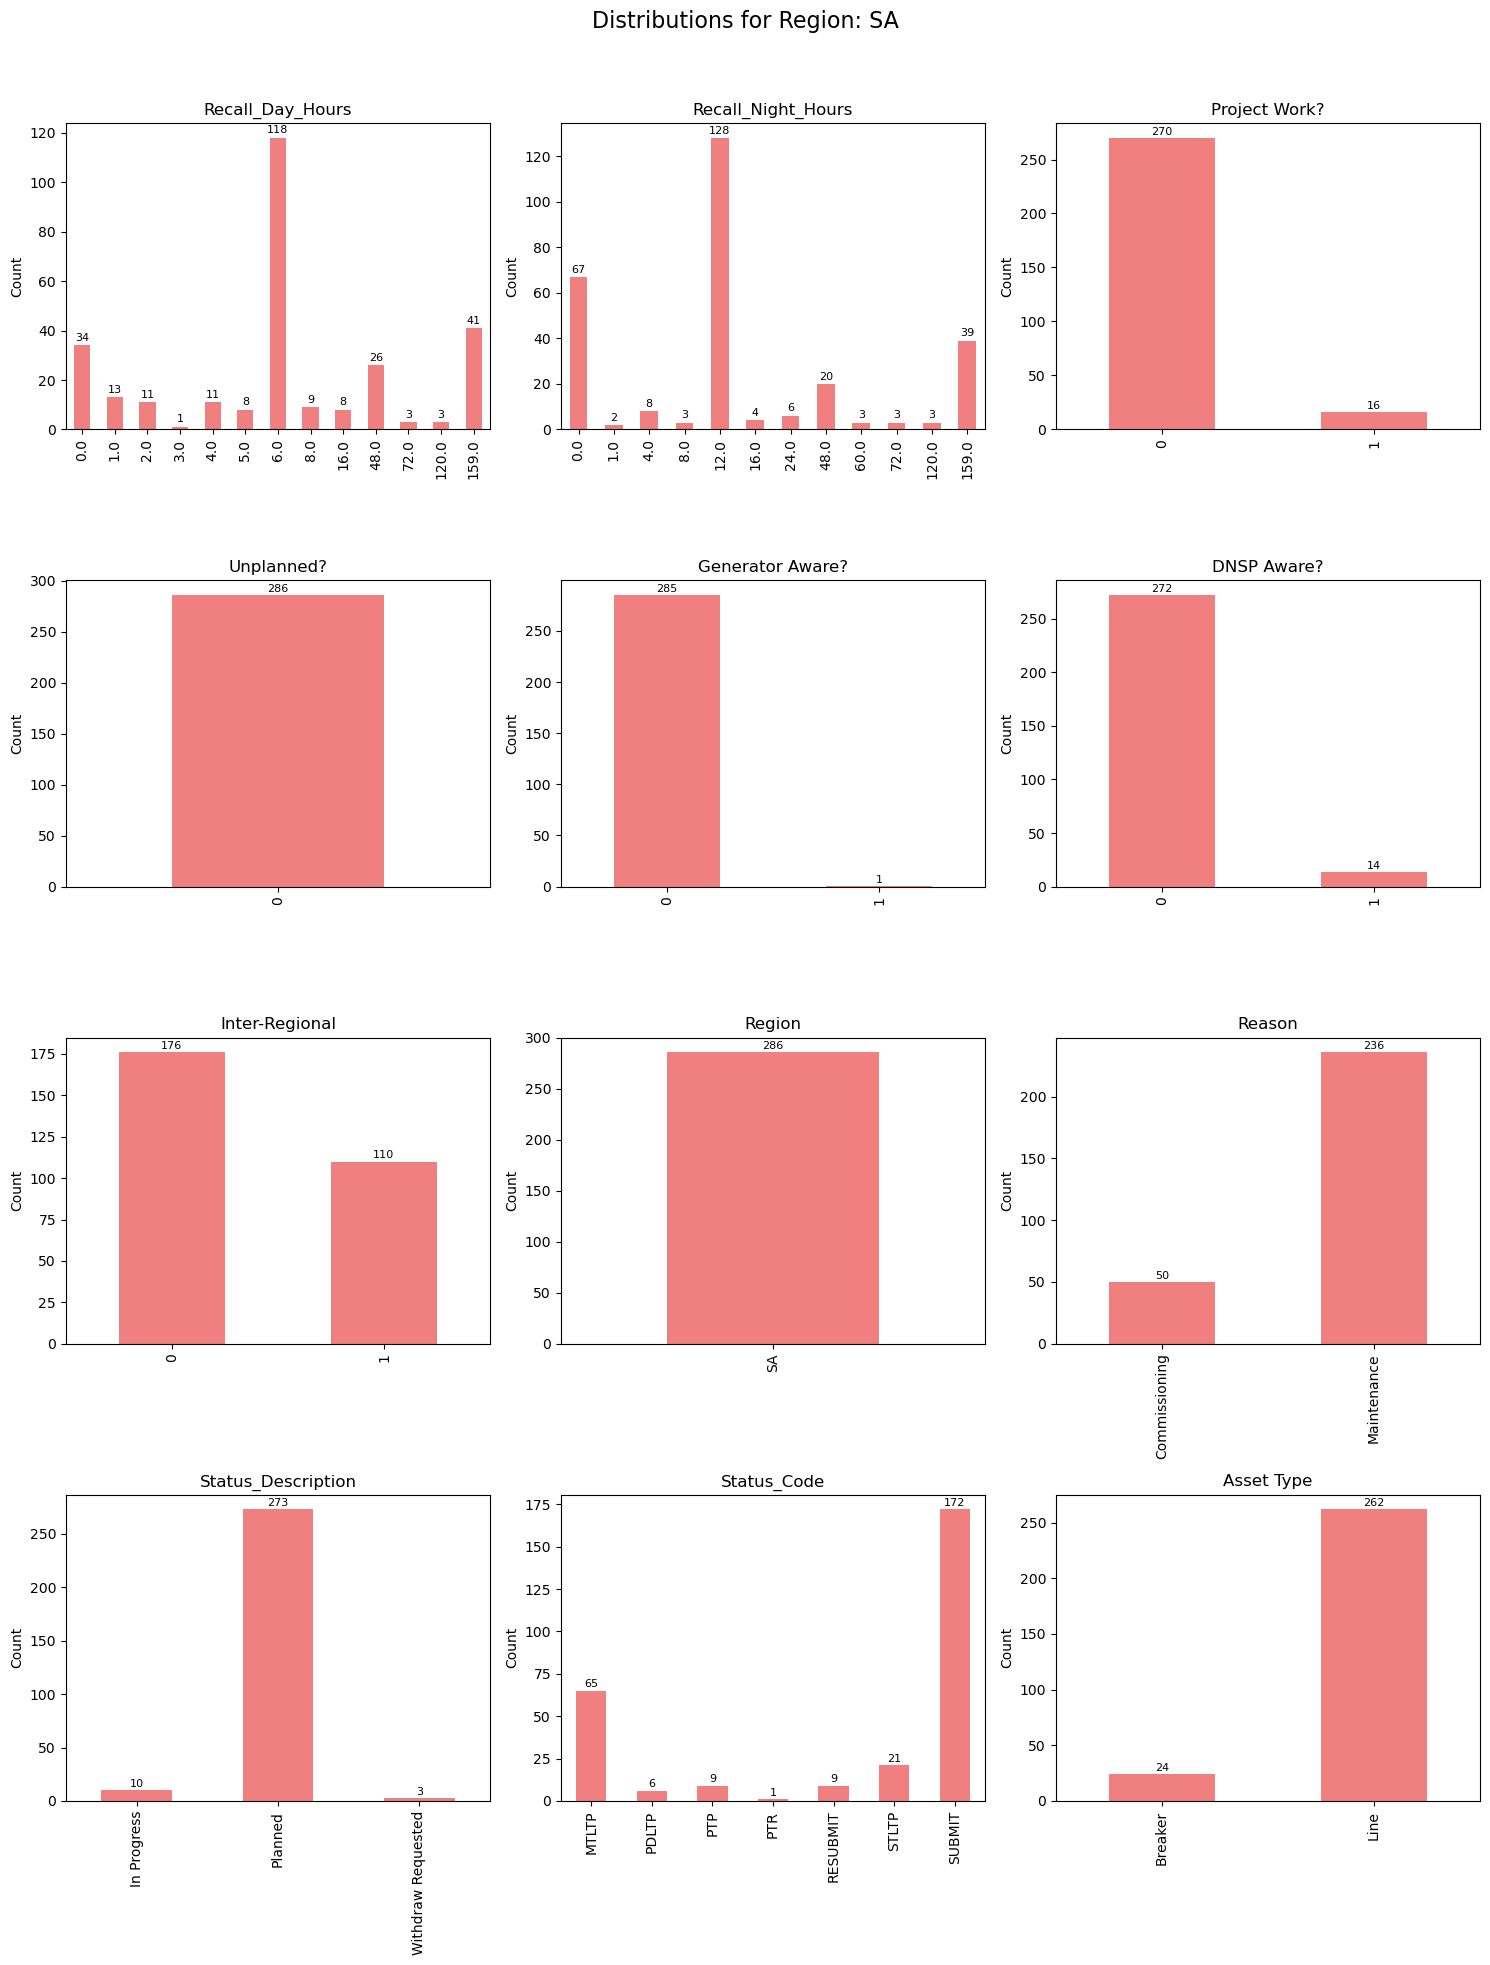

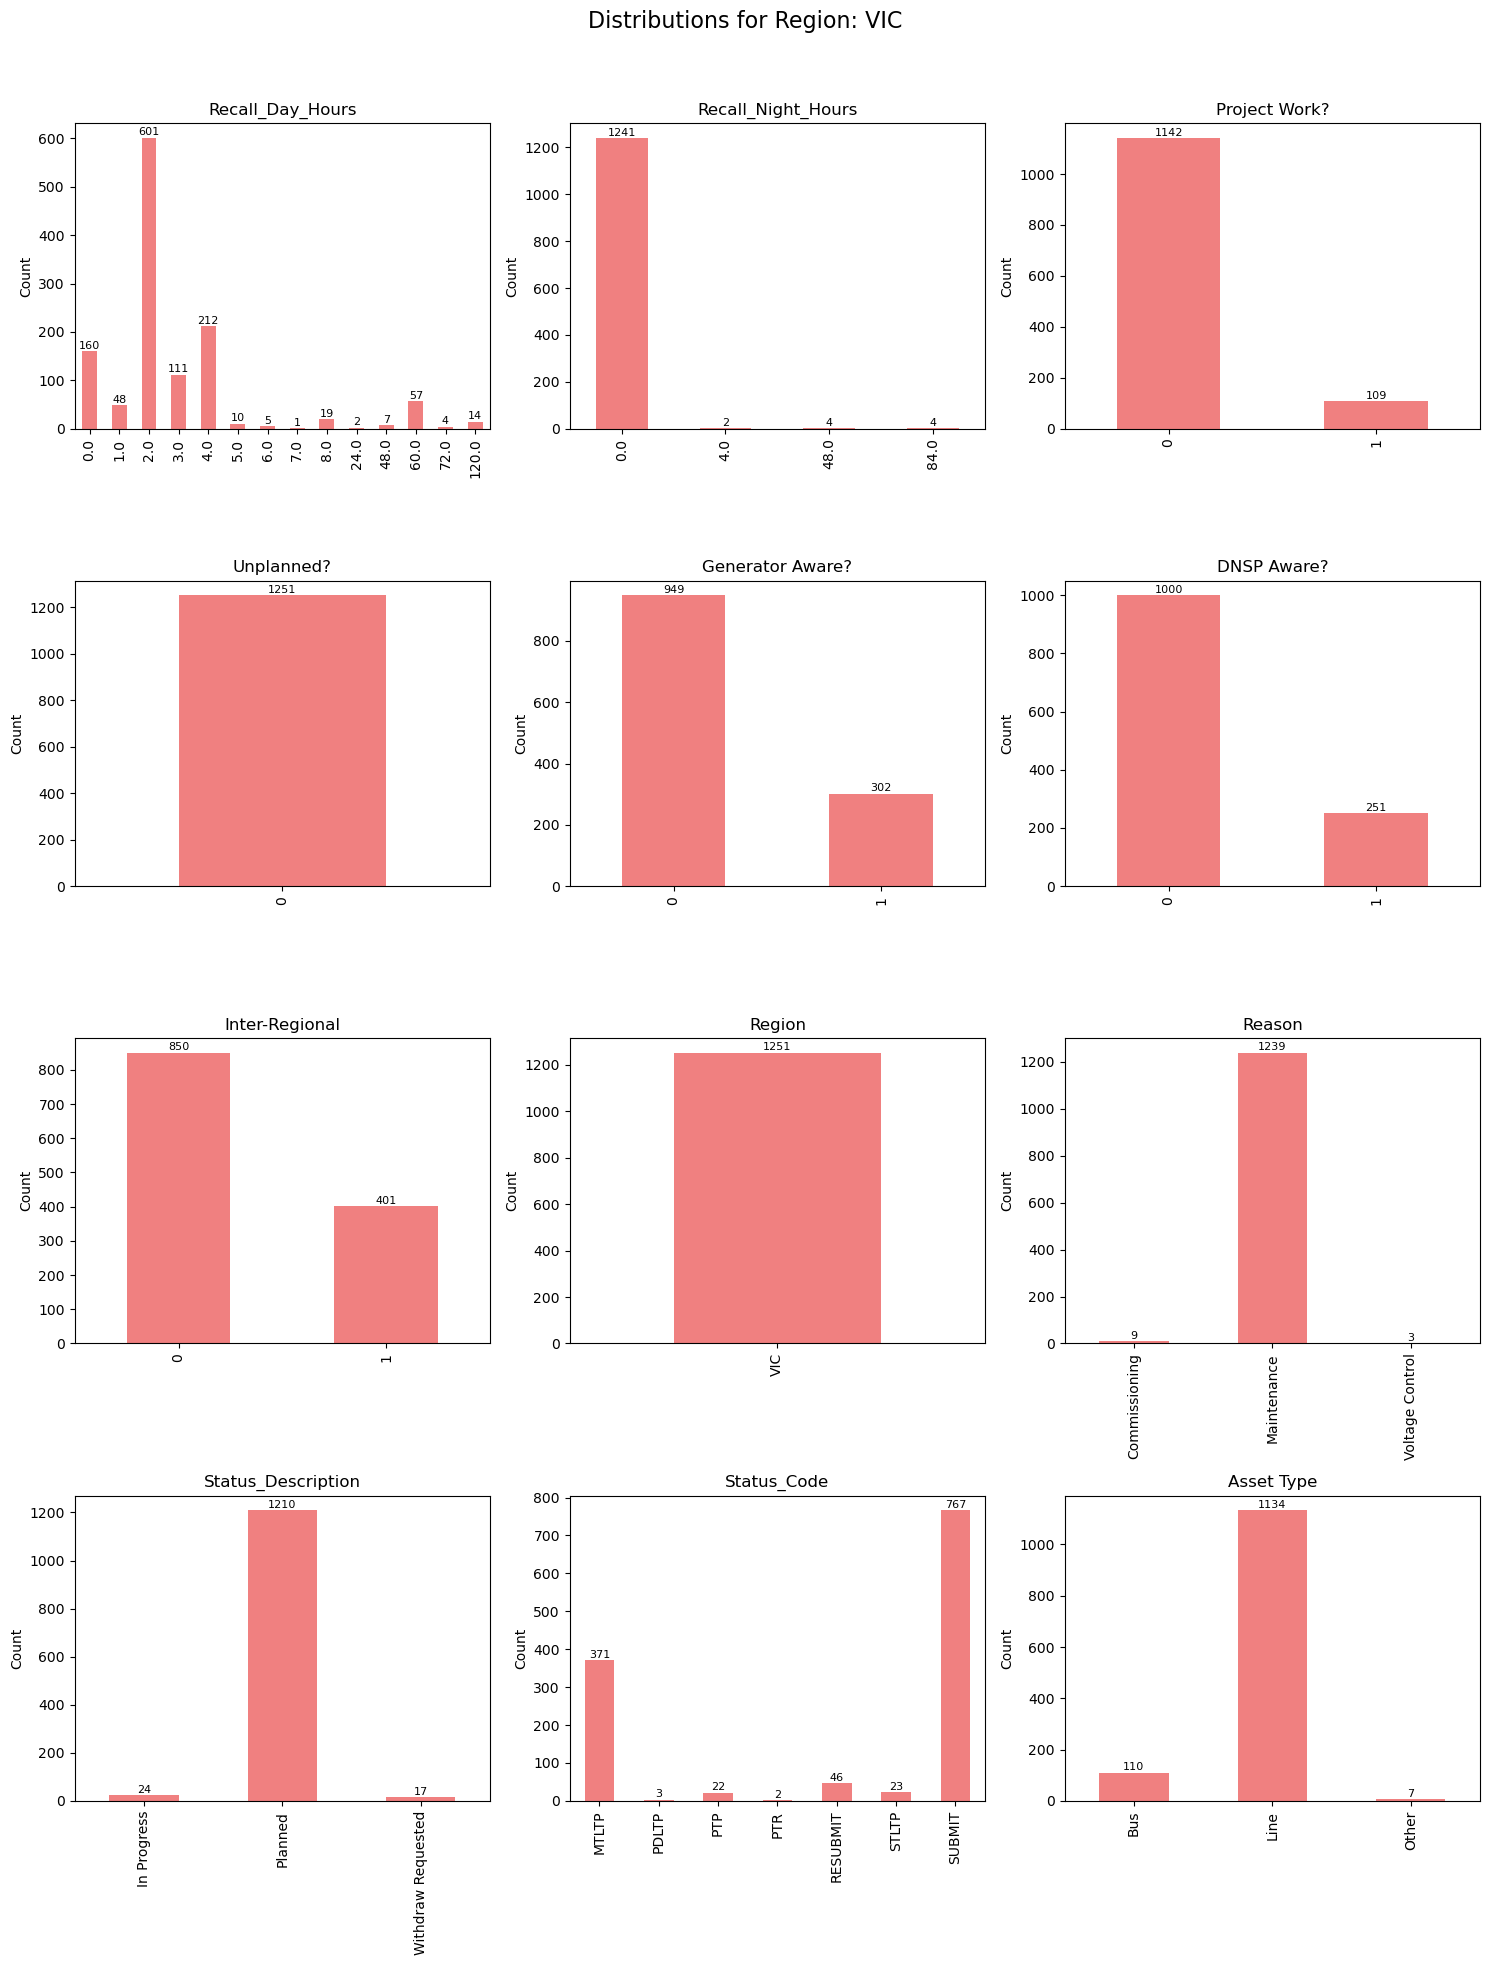

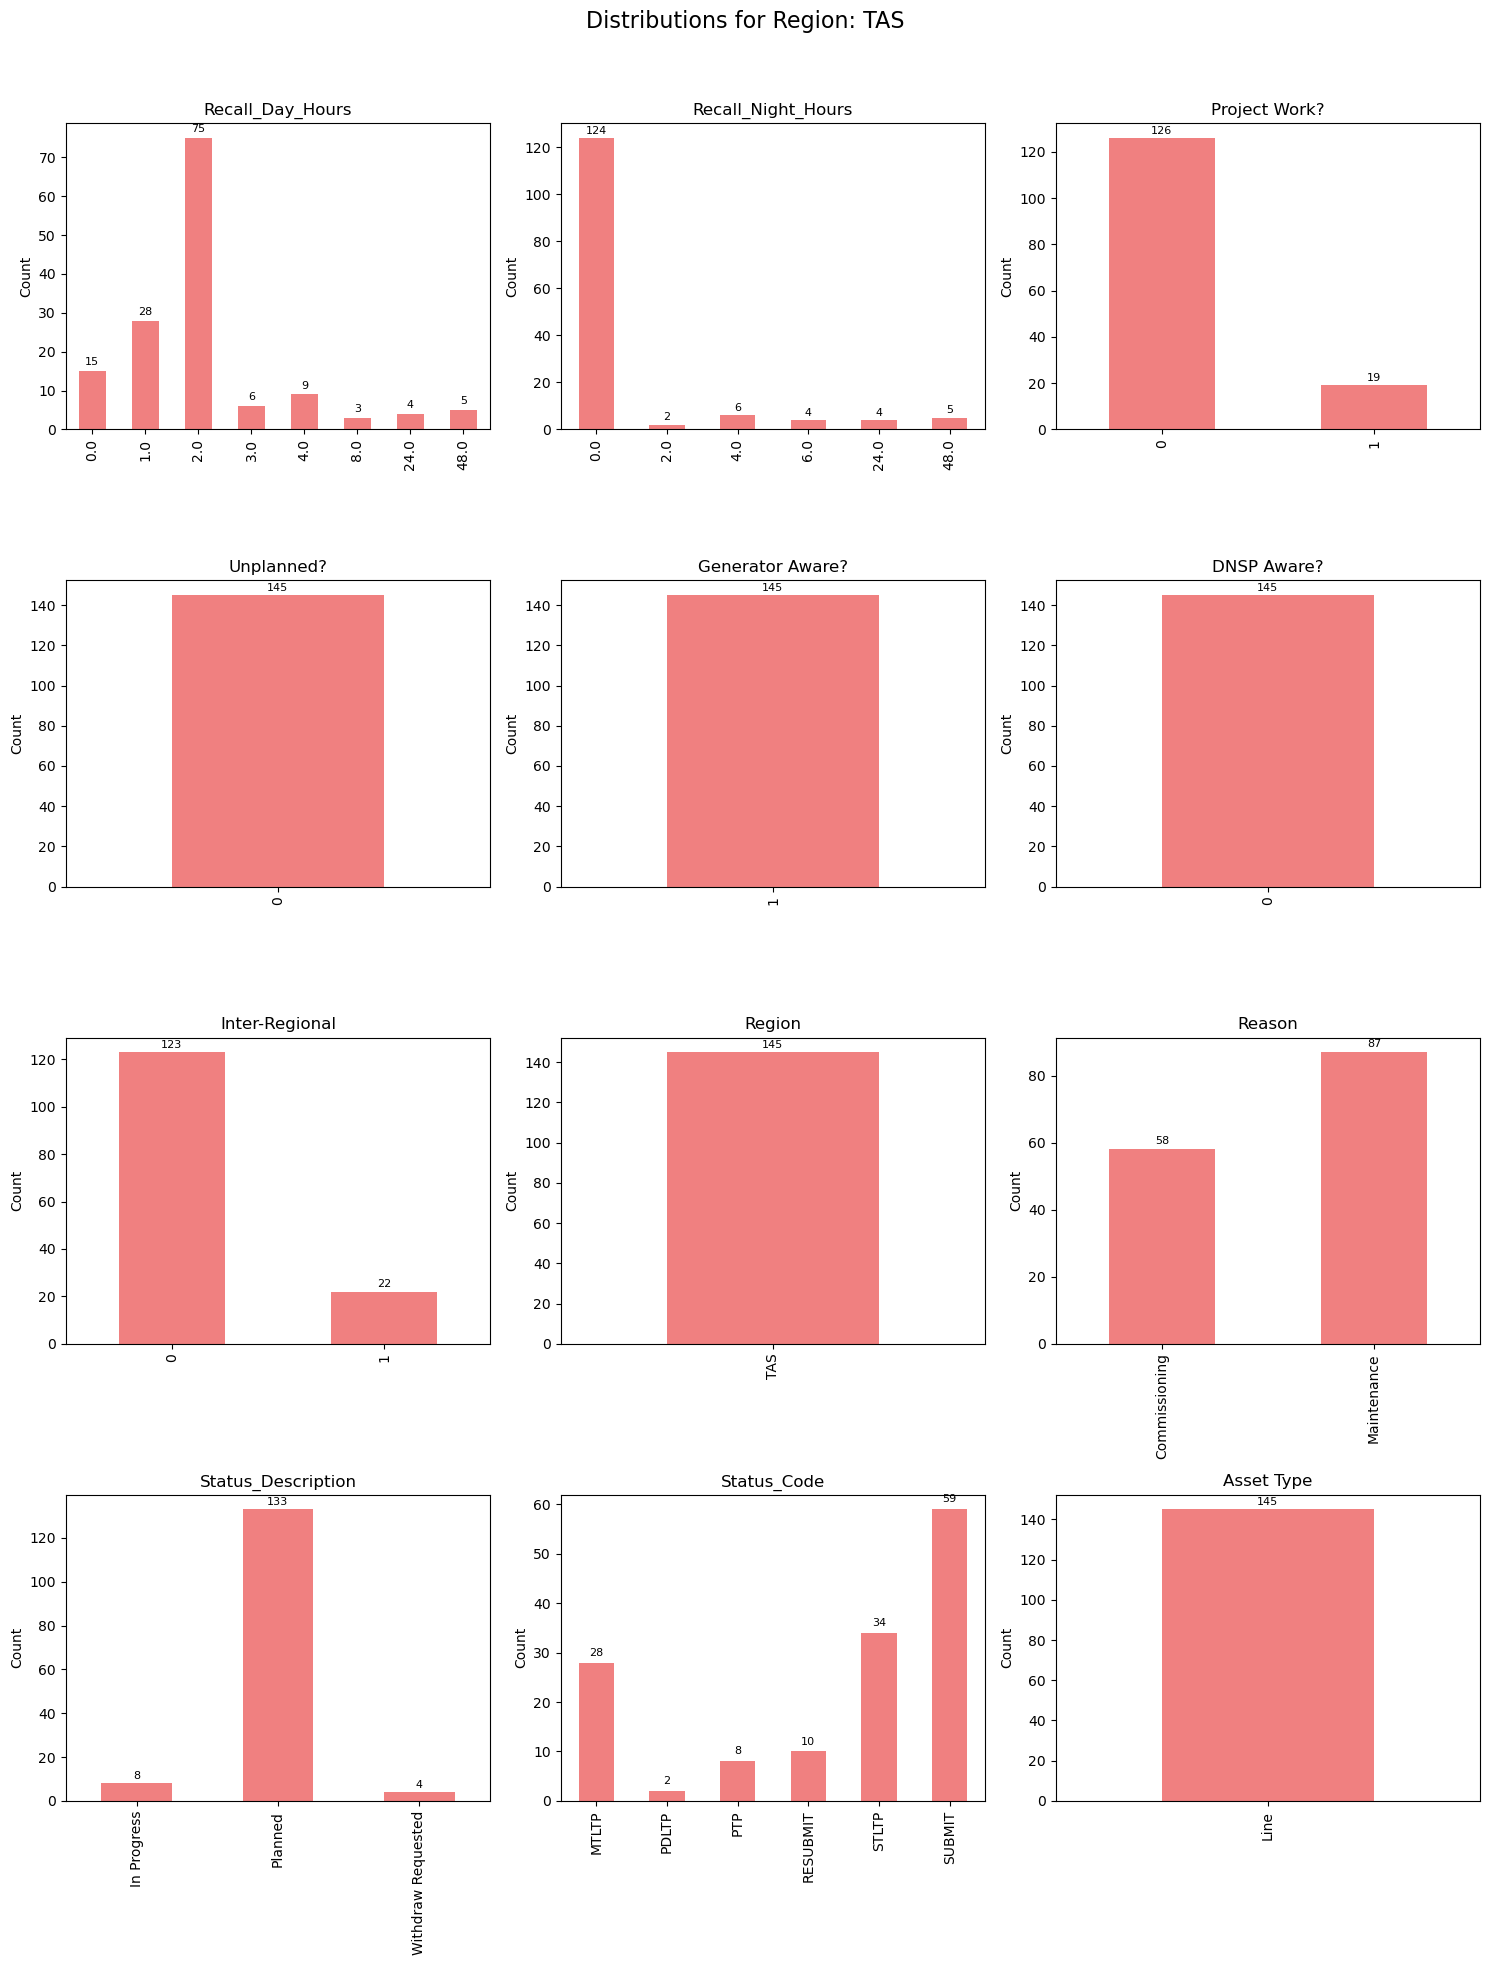

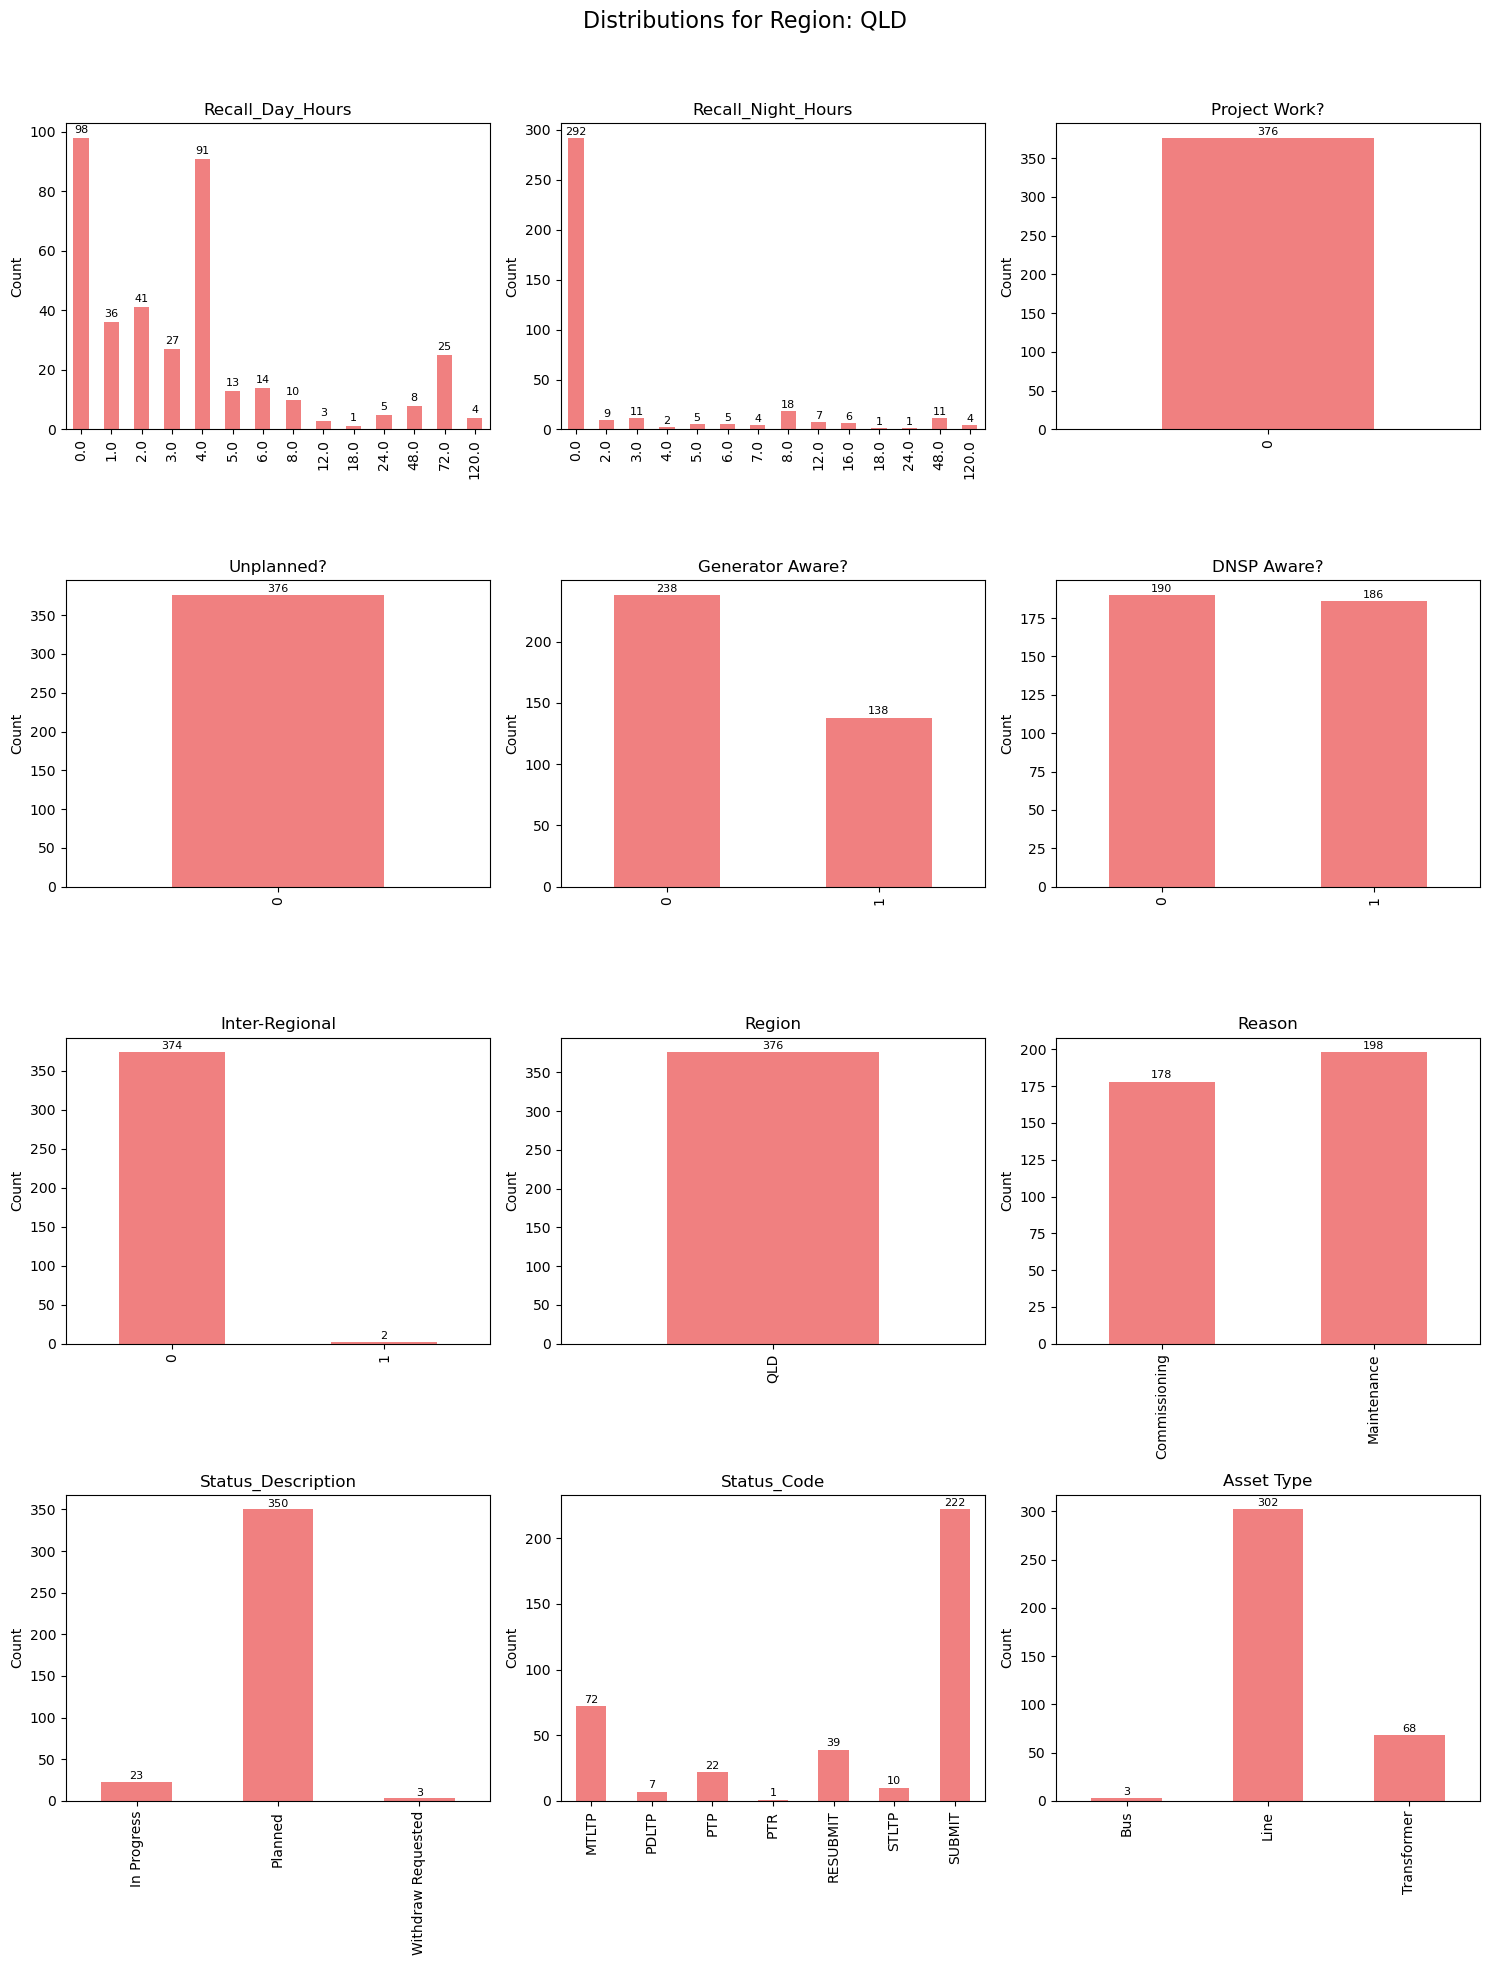

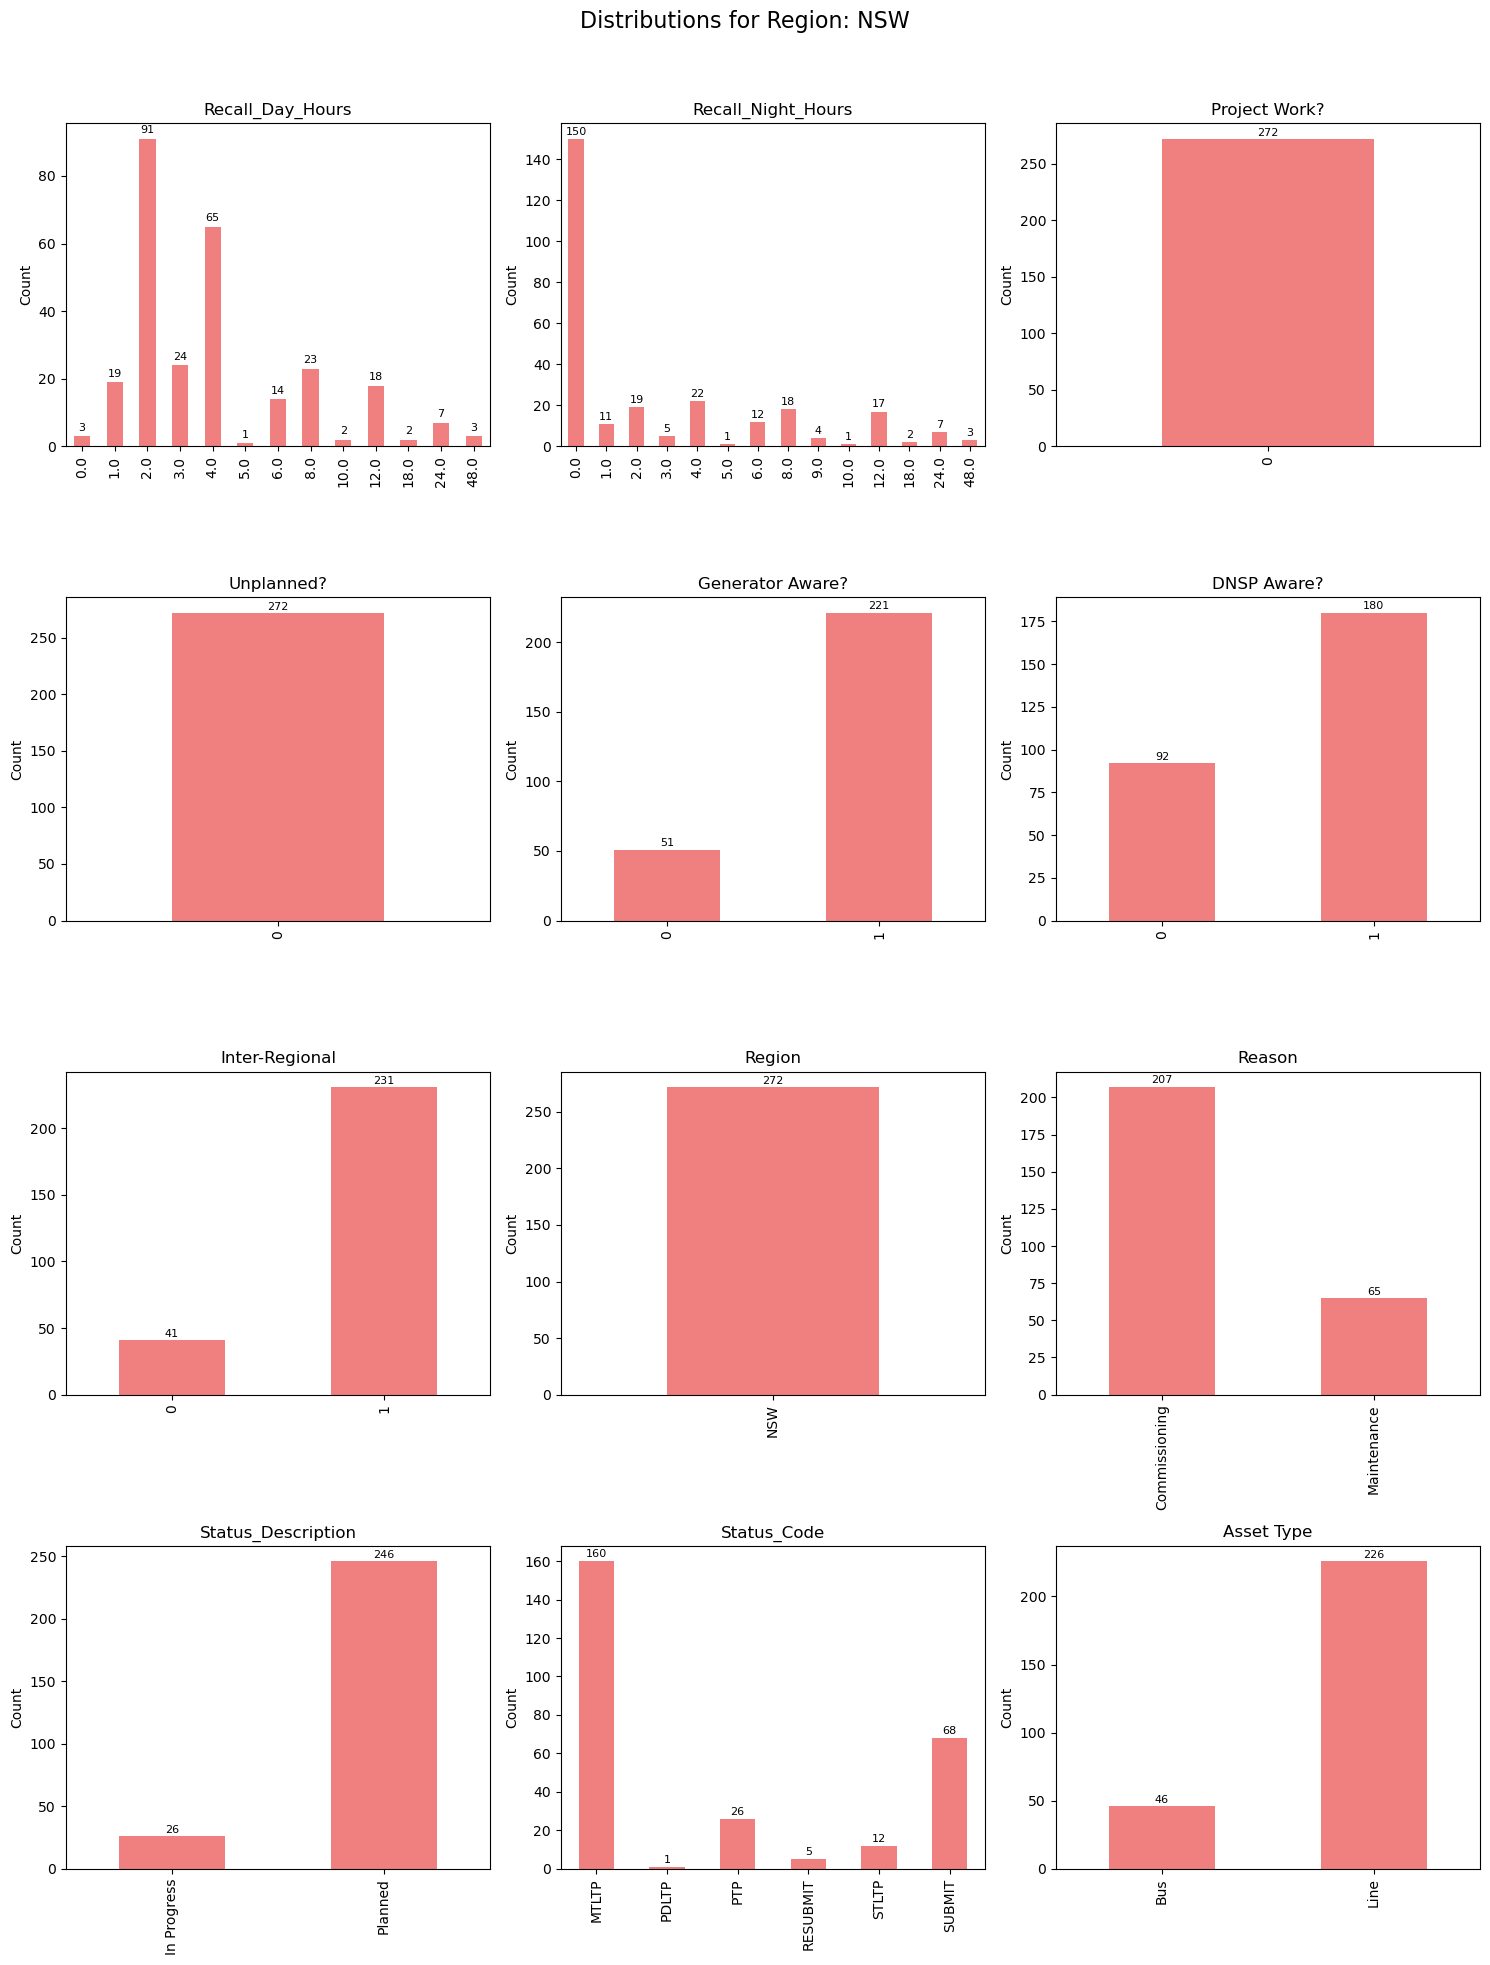

In [18]:
# visualisation for each region

regions = df['Region'].dropna().unique()
n_cols = 3

bool_cols = ['Project Work?', 'Unplanned?', 'Generator Aware?', 'DNSP Aware?', 'Inter-Regional']
numeric_cols = ['Recall_Day_Hours', 'Recall_Night_Hours']
categorical_cols = ['Region', 'Reason', 'Status_Description', 'Status_Code', 'Asset Type']

all_cols = numeric_cols + bool_cols + categorical_cols

for region in regions:
    region_df = df[df['Region'] == region]
    n_rows = (len(all_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(5 * n_cols, 5 * n_rows))
    axes = axes.flatten()
    fig.suptitle(f'Distributions for Region: {region}', fontsize=16)

    for idx, col in enumerate(all_cols):
        ax = axes[idx]
        counts = region_df[col].value_counts().sort_index()
        counts.plot(kind='bar', ax=ax, color='lightcoral')
        ax.set_title(col)
        ax.set_xlabel('')
        ax.set_ylabel('Count')

        for i, value in enumerate(counts):
            ax.text(i, value + 1, str(int(value)), ha='center', va='bottom', fontsize=8)

    for j in range(len(all_cols), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout(rect=[0, 0, 1, 0.96])  
    plt.show()

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## Perform regression for each state

In [20]:
from data.functions.regression_summary_and_plots import regression_summary_and_plots

In [21]:
# Loop through each unique region and assign a separate DataFrame
for region in df['Region'].unique():
    var_name = region.replace(" ", "_")  
    globals()[var_name] = df[df['Region'] == region].copy()


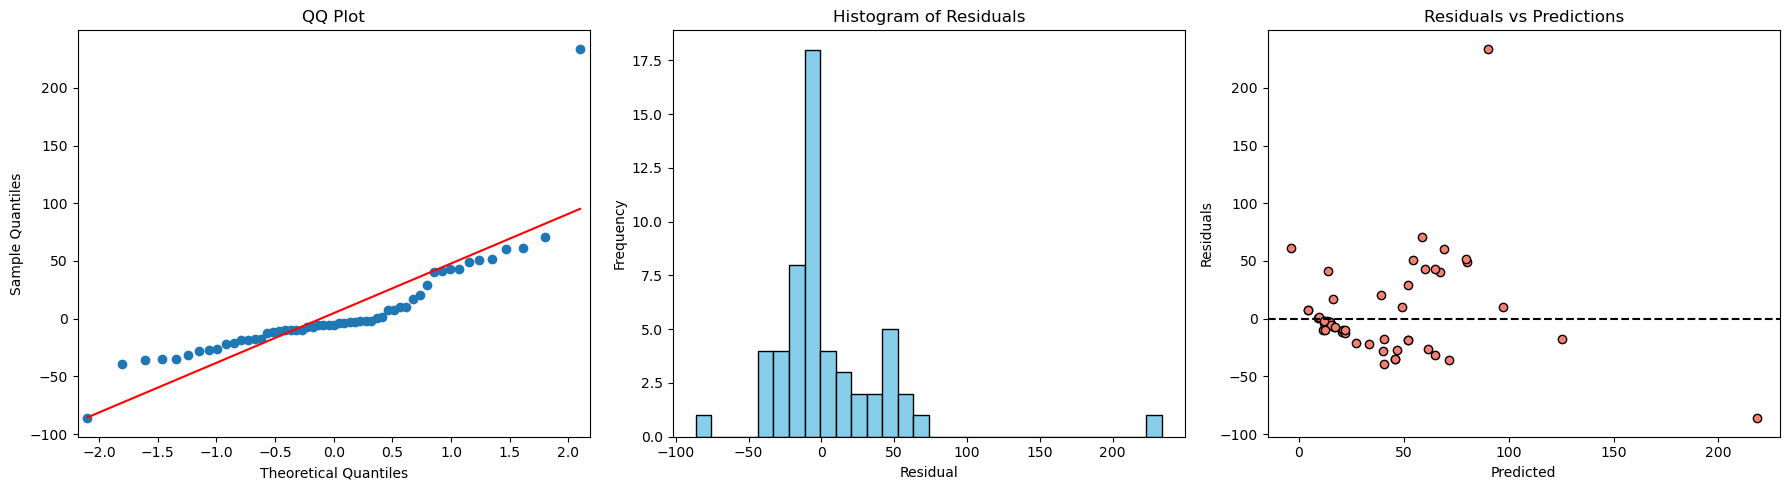

                            OLS Regression Results                            
Dep. Variable:         Duration_Hours   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     13.23
Date:                Mon, 28 Apr 2025   Prob (F-statistic):           5.71e-20
Time:                        23:34:49   Log-Likelihood:                -1101.0
No. Observations:                 217   AIC:                             2228.
Df Residuals:                     204   BIC:                             2272.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.4063      5.350      5.496      0.0

In [27]:
regression_summary_and_plots(NSW, 
                             ['Recall_Day_Hours', 'Recall_Night_Hours', 'Generator Aware?', 'DNSP Aware?', 'Inter-Regional', 'Reason', 'Status_Description', 'Status_Code', 'Asset Type'])

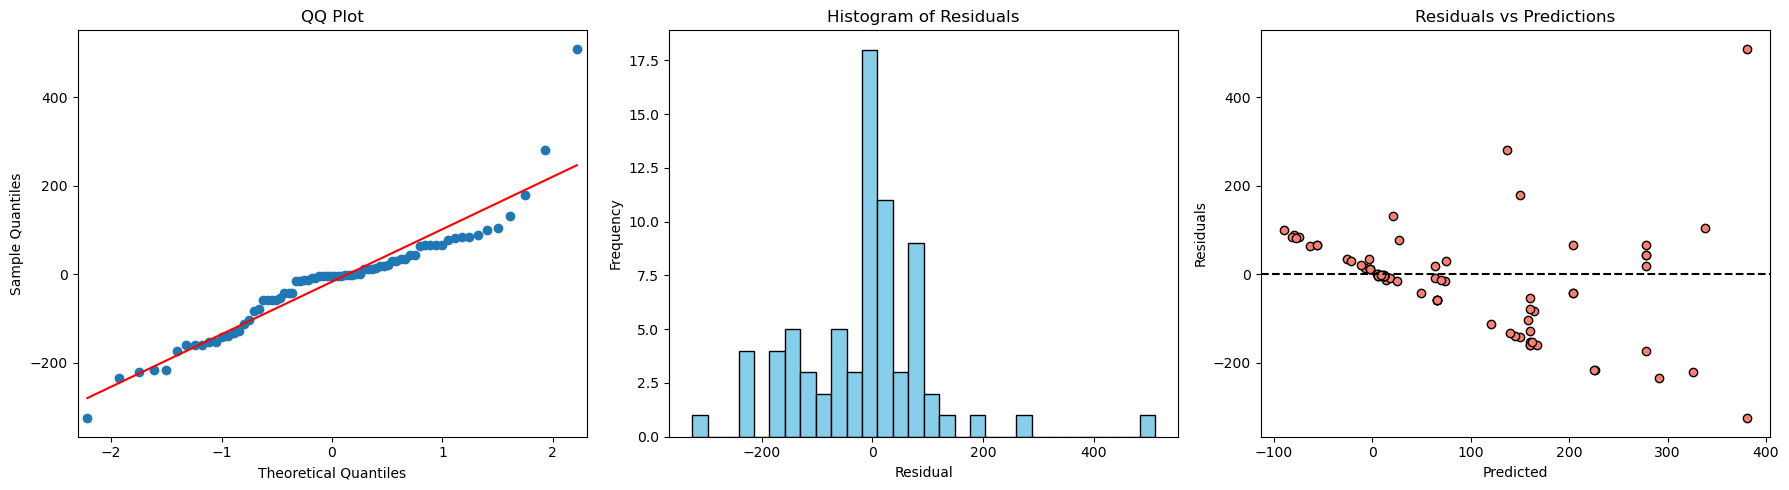

                            OLS Regression Results                            
Dep. Variable:         Duration_Hours   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     11.01
Date:                Mon, 28 Apr 2025   Prob (F-statistic):           5.18e-19
Time:                        23:35:24   Log-Likelihood:                -1919.3
No. Observations:                 296   AIC:                             3867.
Df Residuals:                     282   BIC:                             3918.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        123.5822    165.951      0.745      0.4

In [ ]:
regression_summary_and_plots(QLD, 
                             ['Recall_Day_Hours', 'Recall_Night_Hours', 'Generator Aware?', 'DNSP Aware?', 'Reason', 'Status_Code', 'Asset Type'])

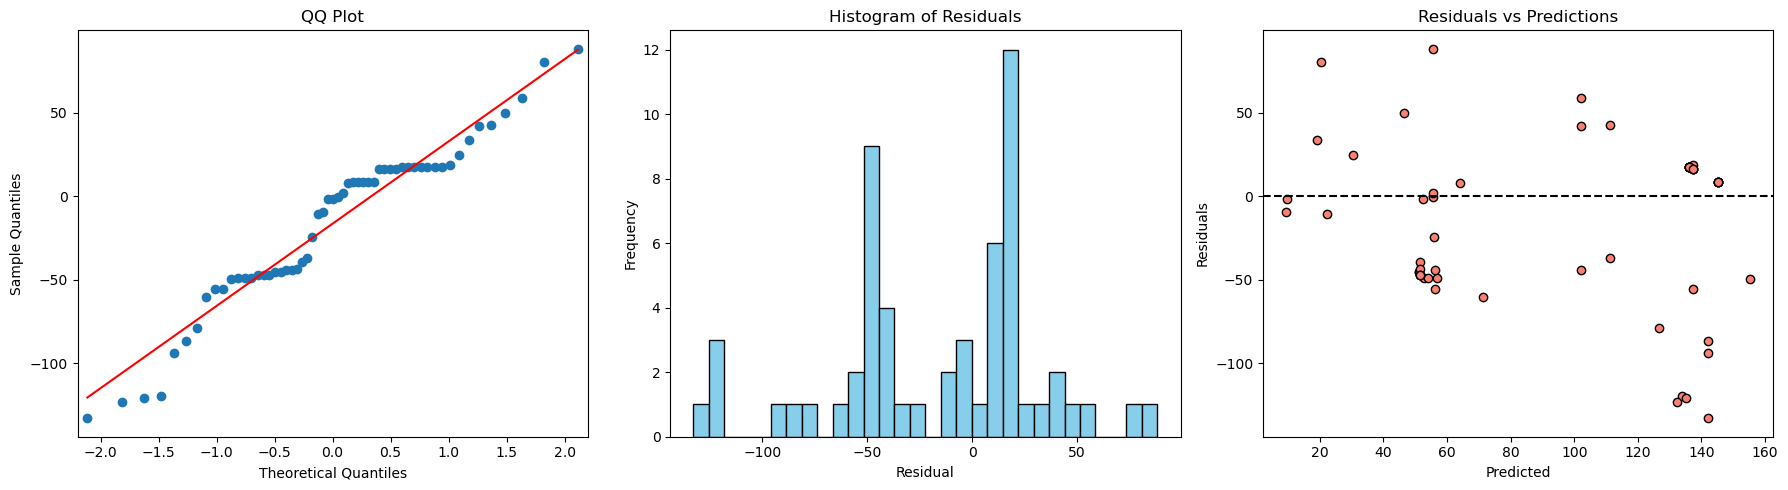

                            OLS Regression Results                            
Dep. Variable:         Duration_Hours   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     10.38
Date:                Mon, 28 Apr 2025   Prob (F-statistic):           2.99e-14
Time:                        23:37:44   Log-Likelihood:                -1289.9
No. Observations:                 226   AIC:                             2602.
Df Residuals:                     215   BIC:                             2639.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6391     32.571      0.173      0.8

In [29]:
regression_summary_and_plots(SA, 
                             ['Recall_Day_Hours', 'Recall_Night_Hours', 'Inter-Regional', 'Reason', 'Status_Code', 'Asset Type'])

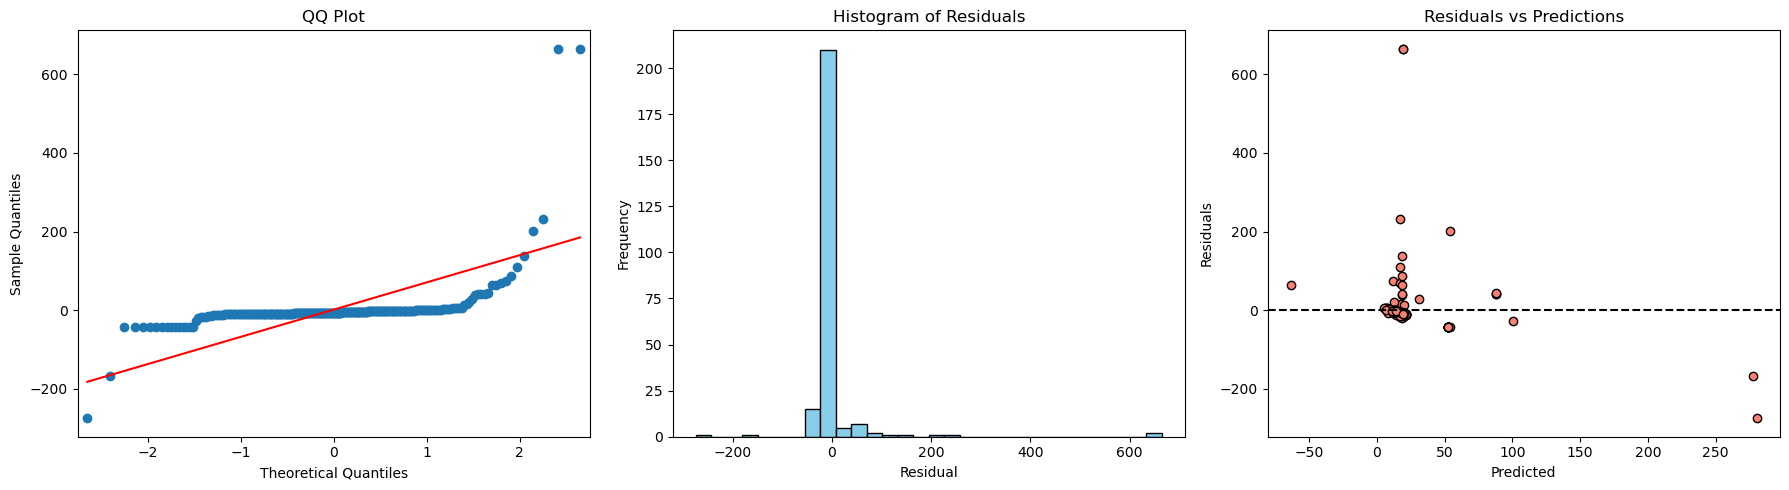

                            OLS Regression Results                            
Dep. Variable:         Duration_Hours   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     13.11
Date:                Mon, 28 Apr 2025   Prob (F-statistic):           1.05e-28
Time:                        23:38:17   Log-Likelihood:                -5294.8
No. Observations:                 987   AIC:                         1.062e+04
Df Residuals:                     972   BIC:                         1.069e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.3805     19.755      2.247      0.0

In [30]:
regression_summary_and_plots(VIC, 
                             ['Recall_Day_Hours', 'Generator Aware?', 'DNSP Aware?', 'Inter-Regional', 'Reason', 'Status_Code', 'Asset Type'])

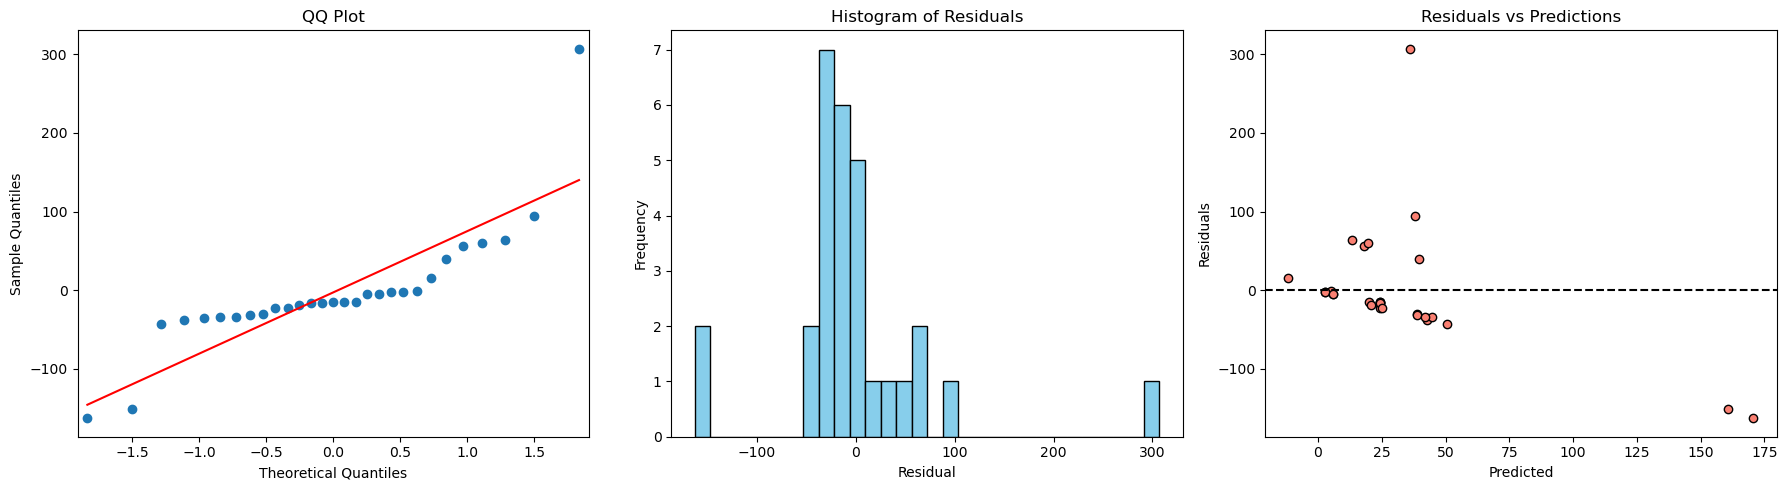

                            OLS Regression Results                            
Dep. Variable:         Duration_Hours   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     3.823
Date:                Mon, 28 Apr 2025   Prob (F-statistic):           0.000211
Time:                        23:38:47   Log-Likelihood:                -620.18
No. Observations:                 112   AIC:                             1262.
Df Residuals:                     101   BIC:                             1292.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.7102     16.075      0.604      0.5

In [32]:
regression_summary_and_plots(TAS, 
                             ['Recall_Day_Hours', 'Recall_Night_Hours', 'Project Work?', 'Inter-Regional', 'Reason', 'Status_Code'])